# Кластеризация|

# Содержание работы

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузите прилагающийся датасет. Проверьте его на чистоту, подготовьте к моделированию.


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/mall_customers_clustering.csv', index_col=0)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


<Axes: xlabel='Income', ylabel='Score'>

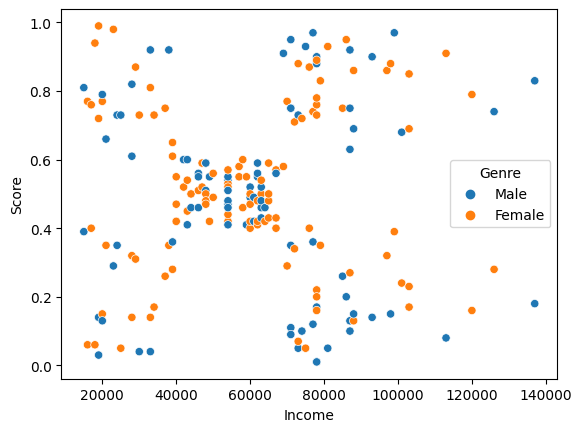

In [4]:
sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')


In [5]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)
X.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,19,15000,0.39,0,1
1,21,15000,0.81,0,1
2,20,16000,0.06,1,0
3,23,16000,0.77,1,0
4,31,17000,0.40,1,0


### 2. Разбейте датасет на три кластера методом К-средних. Оцените качество кластеризации по метрике WCSS.

In [6]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42).fit(X)

In [7]:
print("WCSS:", k_means.inertia_)

WCSS: 25640495835.578606


### 3. Визуализируйте результат кластеризации. Выведите центры кластеров.

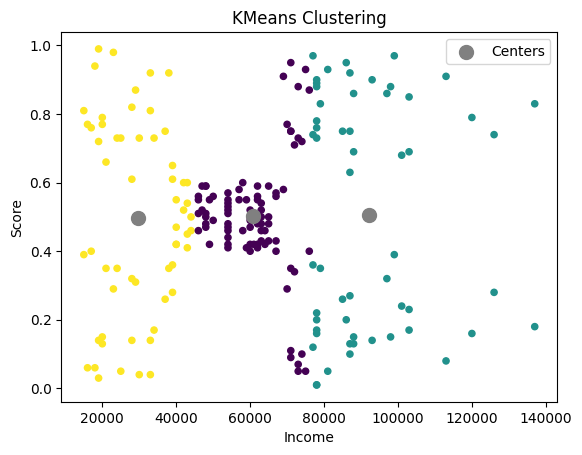

In [8]:
X_plot = x[['Income', 'Score']]
k_means = KMeans(n_clusters=3, random_state=42).fit(X_plot)
y_kmeans = k_means.labels_
centers = k_means.cluster_centers_

plt.scatter(x['Income'], x['Score'], c=y_kmeans, s=20, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='grey', s=100, marker='o', label='Centers')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.title('KMeans Clustering')
plt.show()

### 4. Выберите оптимальное количество кластеров методом локтя. Визуализируйте получившуюся кластеризацию.


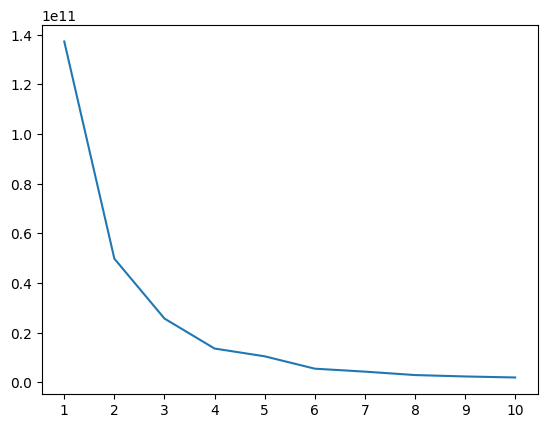

In [9]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

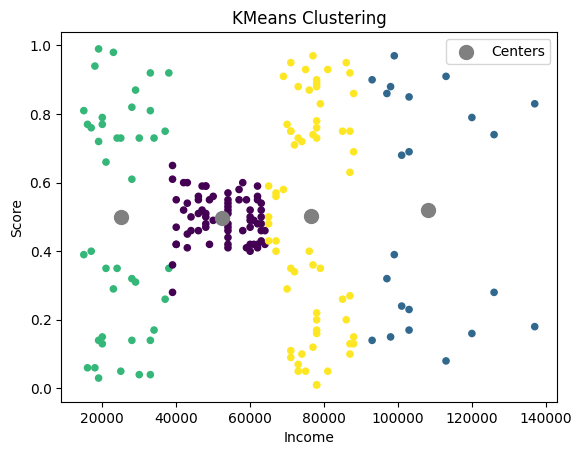

In [10]:
X_plot = x[['Income', 'Score']]
k_means = KMeans(n_clusters=4, random_state=42).fit(X_plot)
y_kmeans = k_means.labels_
centers = k_means.cluster_centers_

plt.scatter(x['Income'], x['Score'], c=y_kmeans, s=20, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='grey', s=100, marker='o', label='Centers')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.title('KMeans Clustering')
plt.show()

### 5. Постройте кластеризацию с 8 кластерами. Как располагаются их центры и что это значит?

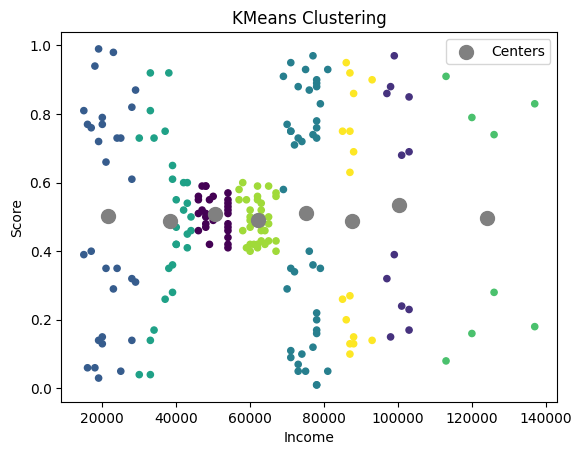

In [11]:
X_plot = x[['Income', 'Score']]
k_means = KMeans(n_clusters=8, random_state=42).fit(X_plot)
y_kmeans = k_means.labels_
centers = k_means.cluster_centers_

plt.scatter(x['Income'], x['Score'], c=y_kmeans, s=20, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='grey', s=100, marker='o', label='Centers')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.title('KMeans Clustering')
plt.show()

### 6. Нормализуйте датасет и повторите кластеризацию.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


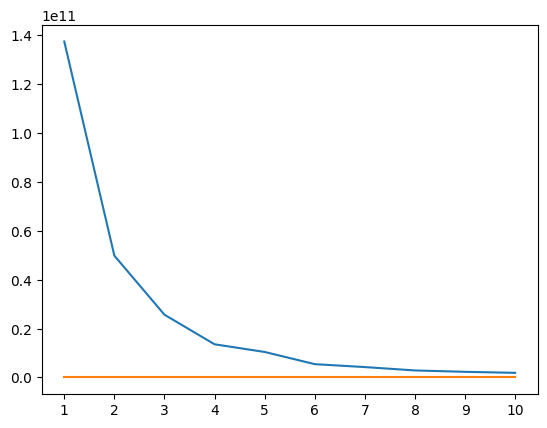

In [13]:
unscaled, scaled = [], []
for i in range(1,11):
	unscaled.append(KMeans(n_clusters=i,random_state=42).fit(X).inertia_)
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),unscaled)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

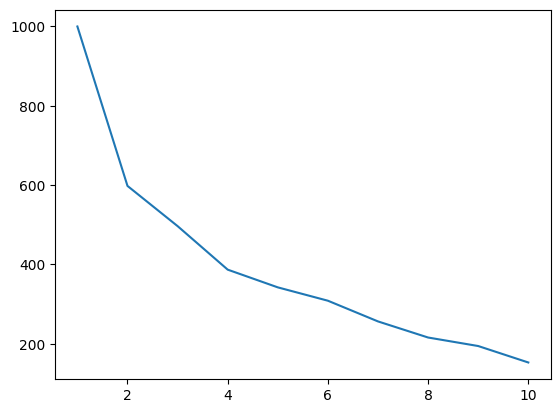

In [14]:
plt.plot(range(1,11), scaled)

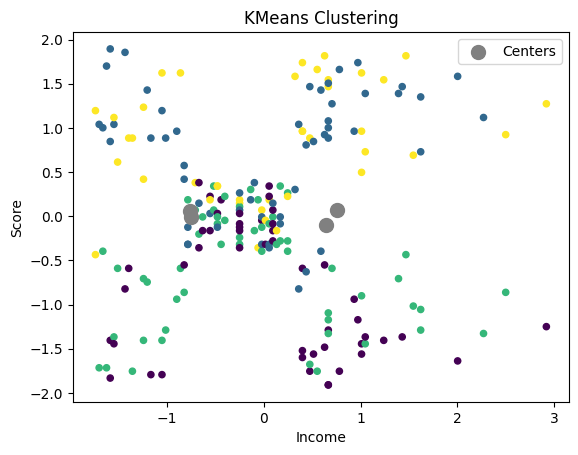

In [15]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_
centers = k_means.cluster_centers_
plt.scatter(X_scaled.Income, X_scaled.Score, c=y_kmeans, s=20, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='grey', s=100, marker='o', label='Centers')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.title('KMeans Clustering')
plt.show()

### 7. Постройте для наглядности кластеризацию только по двум признакам.

In [16]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


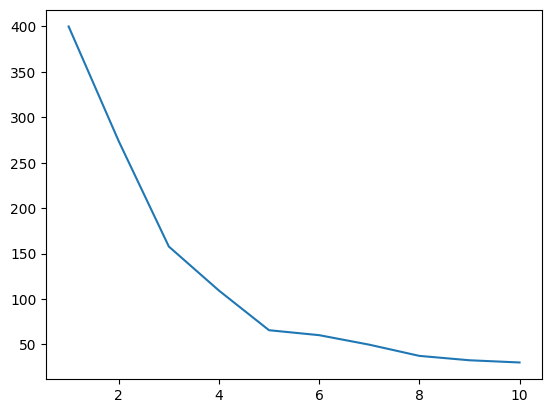

In [17]:
flat = []
for i in range(1,11):
	flat.append(KMeans(n_clusters=i,random_state=42).fit(X_flat).inertia_)
	
plt.plot(range(1,11), flat)

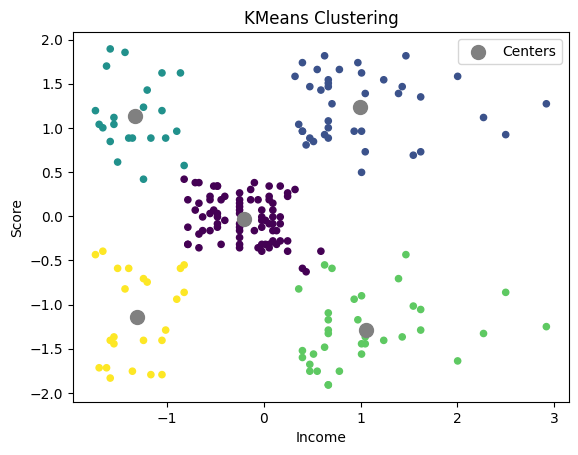

In [18]:
X_plot = X_scaled[['Income', 'Score']]
k_means = KMeans(n_clusters=5, random_state=42).fit(X_plot)
y_kmeans = k_means.labels_
centers = k_means.cluster_centers_

plt.scatter(X_scaled['Income'], X_scaled['Score'], c=y_kmeans, s=20, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='grey', s=100, marker='o', label='Centers')
plt.xlabel('Income')
plt.ylabel('Score')
plt.legend()
plt.title('KMeans Clustering')
plt.show()

### 8. Постройте на том же датасете иерархическую кластеризацию.

In [19]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [20]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

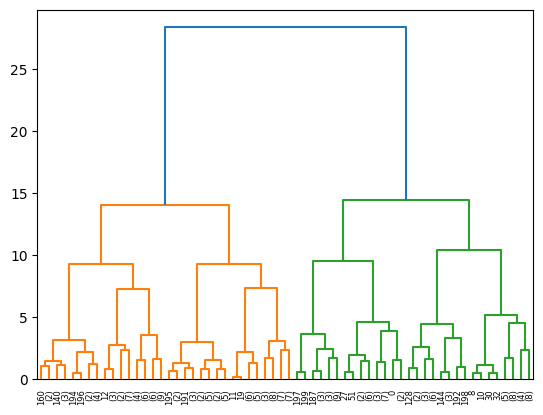

In [21]:
plot_dendrogram(model, truncate_mode="level", p=5)

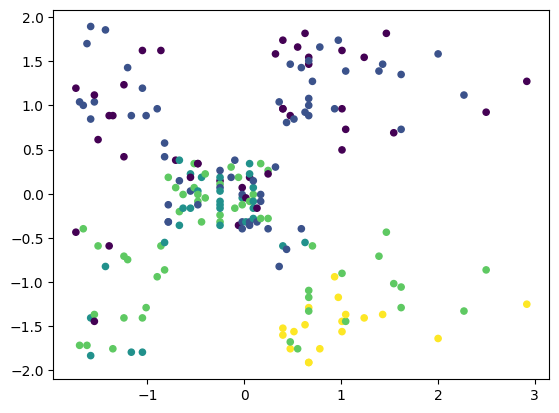

In [22]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

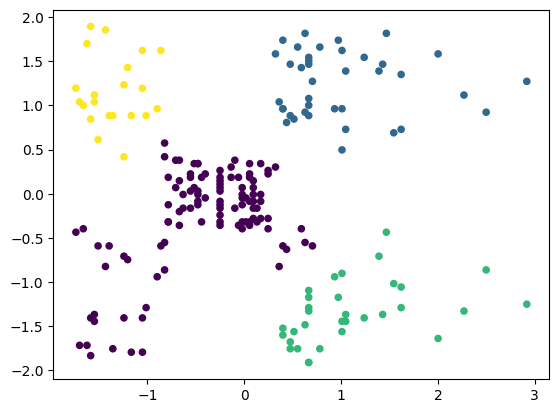

In [23]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

### 9. Постройте на этих же данных кластеризацию методом DBSCAN.

In [24]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

In [25]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

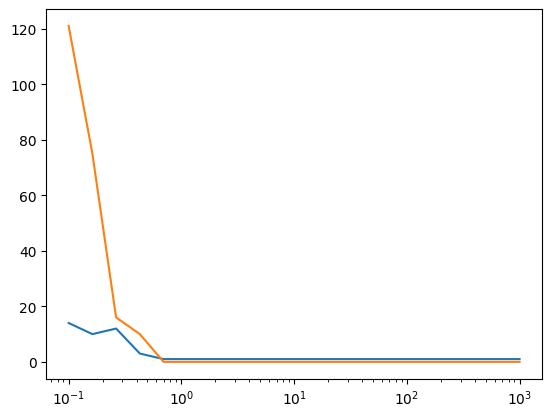

In [26]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

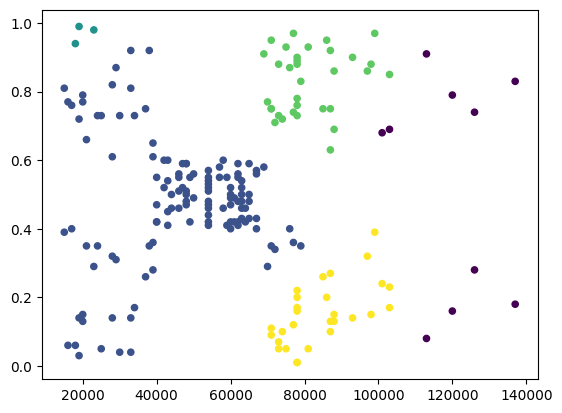

In [27]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')

# Задания для самостоятельной работы

### 1. Для придания смысла кластерам выведите примеры точек выборки для каждого кластера. Сделайте вывод, чем они отличаются.

In [28]:
from sklearn.cluster import KMeans

X_plot = X_scaled
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_plot)
df['Cluster'] = kmeans.labels_

for i in range(kmeans.n_clusters):
    print(f"\nКластер {i}")
    display(df[df['Cluster'] == i].head(5))


Кластер 0


,CustomerID,Genre,Age,Income,Score,Cluster
8,9,Male,64,19000,0.03,0
10,11,Male,67,19000,0.14,0
14,15,Male,37,20000,0.13,0
18,19,Male,52,23000,0.29,0
20,21,Male,35,24000,0.35,0



Кластер 1


,CustomerID,Genre,Age,Income,Score,Cluster
3,4,Female,23,16000,0.77,1
5,6,Female,22,17000,0.76,1
7,8,Female,23,18000,0.94,1
9,10,Female,30,19000,0.72,1
11,12,Female,35,19000,0.99,1



Кластер 2


,CustomerID,Genre,Age,Income,Score,Cluster
2,3,Female,20,16000,0.06,2
4,5,Female,31,17000,0.40,2
6,7,Female,35,18000,0.06,2
12,13,Female,58,20000,0.15,2
16,17,Female,35,21000,0.35,2



Кластер 3


,CustomerID,Genre,Age,Income,Score,Cluster
0,1,Male,19,15000,0.39,3
1,2,Male,21,15000,0.81,3
15,16,Male,22,20000,0.79,3
17,18,Male,20,21000,0.66,3
21,22,Male,25,24000,0.73,3


| Кластер | Характеристика                      | Ценность           |
| ------- | ----------------------------------- | ------------------ |
| 0       | Мужчины, 35+, низкая активность     | Низкая             |
| 1       | Молодые женщины, высокая активность | **Целевая группа** |
| 2       | Женщины, низкая активность          | Средняя/низкая     |
| 3       | Молодые мужчины, хорошая активность | Перспективные      |


### 2. Используйте для визуализации результатов кластеризации другие пары признаков. Сделайте вывод о зависимости кластеризации от признаков.

In [29]:
from sklearn.cluster import KMeans

X_plot = X_scaled[["Income", "Score"]]
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_plot)
df['Cluster'] = kmeans.labels_

for i in range(kmeans.n_clusters):
    print(f"\nКластер {i}")
    display(df[df['Cluster'] == i].head(5))


Кластер 0


,CustomerID,Genre,Age,Income,Score,Cluster
0,1,Male,19,15000,0.39,0
2,3,Female,20,16000,0.06,0
4,5,Female,31,17000,0.40,0
6,7,Female,35,18000,0.06,0
8,9,Male,64,19000,0.03,0



Кластер 1


,CustomerID,Genre,Age,Income,Score,Cluster
123,124,Male,39,69000,0.91,1
125,126,Female,31,70000,0.77,1
127,128,Male,40,71000,0.95,1
129,130,Male,38,71000,0.75,1
131,132,Male,39,71000,0.75,1



Кластер 2


,CustomerID,Genre,Age,Income,Score,Cluster
1,2,Male,21,15000,0.81,2
3,4,Female,23,16000,0.77,2
5,6,Female,22,17000,0.76,2
7,8,Female,23,18000,0.94,2
9,10,Female,30,19000,0.72,2



Кластер 3


,CustomerID,Genre,Age,Income,Score,Cluster
124,125,Female,23,70000,0.29,3
126,127,Male,43,71000,0.35,3
128,129,Male,59,71000,0.11,3
130,131,Male,47,71000,0.09,3
132,133,Female,25,72000,0.34,3


В зависимости от признаков кластеризации, группировка идет по другим признакам 

### 3. Повторите весь анализ для другого датасета - кластеризации кредитных карт.

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/credit_card_clustering.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [31]:
df.info()

df = df.dropna(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [33]:
from sklearn.preprocessing import StandardScaler

df = df.drop("CUST_ID", axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

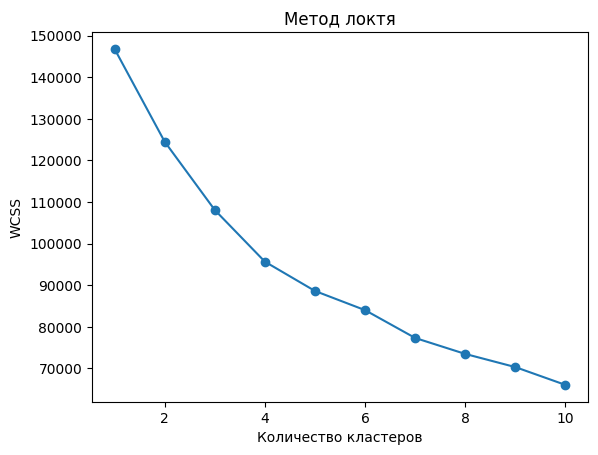

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.title('Метод локтя')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

for i in range(4):
    print(f"\nКластер {i}")
    display(df[df["Cluster"] == i].sample(5, random_state=42))

df.groupby("Cluster").mean()


Кластер 0


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6417,2273.555853,1.0,329.30,70.00,259.30,3360.638010,0.583333,0.083333,0.500000,0.750000,16,10,3000.0,3099.112794,758.644505,0.0,12,0
1769,5681.962807,1.0,523.19,340.19,183.00,1116.370312,0.666667,0.166667,0.416667,0.250000,4,8,11500.0,2167.822526,1433.734576,0.0,12,0
679,7025.757291,1.0,66.32,66.32,0.00,8733.135566,0.083333,0.083333,0.000000,0.583333,16,1,9000.0,9547.622542,2385.432813,0.0,12,0
1954,5291.221238,1.0,2090.47,1965.41,125.06,1153.665768,0.500000,0.500000,0.416667,0.250000,3,21,15000.0,1718.461993,1495.799354,0.0,12,0
4966,2659.411879,1.0,177.62,177.62,0.00,1831.115496,0.166667,0.166667,0.000000,0.583333,19,4,4000.0,577.131439,624.924987,0.0,12,0



Кластер 1


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
8406,1157.568538,1.000000,329.00,37.0,292.00,0.000000,0.666667,0.083333,0.666667,0.000000,0,9,2500.0,603.250222,567.942336,0.000000,12,1
8931,46.814144,0.833333,235.80,0.0,235.80,0.000000,0.833333,0.000000,0.666667,0.000000,0,6,1500.0,189.090274,89.496604,0.666667,6,1
684,3472.806962,1.000000,1800.00,0.0,1800.00,2642.846513,1.000000,0.000000,1.000000,0.083333,7,12,6000.0,2214.368263,4093.868044,0.000000,12,1
7031,275.883700,1.000000,424.44,0.0,424.44,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2500.0,159.715319,169.767772,0.000000,12,1
8004,35.120942,1.000000,372.00,0.0,372.00,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2700.0,361.050924,156.723469,0.545455,12,1



Кластер 2


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1218,599.044829,1.0,6528.65,4859.87,1668.78,0.000000,1.0,1.000000,1.0,0.000000,0,113,12000.0,5779.079513,176.295409,1.00,12,2
6028,4507.000722,1.0,7394.18,2288.20,5105.98,5424.701791,1.0,0.916667,1.0,0.833333,40,130,11000.0,10460.879460,1076.589500,0.00,12,2
565,4546.766836,1.0,3525.37,0.00,3525.37,0.000000,1.0,0.000000,1.0,0.000000,0,66,15000.0,14083.968090,1442.933291,0.25,12,2
3510,10124.472140,1.0,4795.49,2006.02,2789.47,0.000000,1.0,0.666667,1.0,0.000000,0,87,15000.0,2552.784306,2780.902332,0.00,12,2
2345,5925.120611,1.0,1763.89,258.43,1505.46,0.000000,1.0,0.250000,1.0,0.000000,0,195,6500.0,2557.841292,2268.544117,0.00,12,2



Кластер 3


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
5917,1201.623610,1.000000,55.40,55.40,0.00,109.368400,0.083333,0.083333,0.0,0.083333,2,1,1200.0,188.413804,5603.542008,0.0,12,3
3628,1624.004773,1.000000,0.00,0.00,0.00,223.285625,0.000000,0.000000,0.0,0.250000,5,0,1800.0,781.308189,489.267058,0.0,12,3
7674,1610.489628,1.000000,0.00,0.00,0.00,811.491192,0.000000,0.000000,0.0,0.250000,3,0,2000.0,383.426341,362.428606,0.0,12,3
4805,949.530268,1.000000,45.65,45.65,0.00,47.786053,0.083333,0.083333,0.0,0.083333,1,1,1000.0,303.450157,456.016895,0.0,12,3
2535,9.526312,0.545455,92.02,0.00,92.02,0.000000,0.500000,0.000000,0.5,0.000000,0,6,1600.0,100.915736,82.436727,0.5,12,3


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,4652.097509,0.969074,511.046007,324.079611,187.054270,4589.613925,0.290294,0.140258,0.187624,0.487583,14.471910,7.810717,7643.089495,3565.572456,2037.471793,0.035464,11.384615
1,970.417580,0.950767,1374.131996,687.243458,687.076807,223.014367,0.894701,0.318794,0.720942,0.043822,0.821224,23.994272,4384.766431,1467.271892,665.956202,0.274339,11.624359
2,3941.953414,0.985355,8980.111024,5968.520137,3013.638669,764.360695,0.945113,0.732697,0.794027,0.079889,2.436860,99.423208,10332.593857,8588.948805,2368.704593,0.292978,11.952218
3,1052.425406,0.818274,277.900840,212.097638,66.154836,597.523951,0.181687,0.088868,0.088921,0.117719,2.180667,3.119669,3266.477987,1008.499009,569.598205,0.087591,11.470406


### 4. В задании на иерархическую кластеризацию используйте разные методы расчета расстояния между кластерами. Сделайте выводы.

In [36]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import numpy as np

def plot_dendrogram(model, title, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    plt.figure(figsize=(10, 4))
    plt.title(title)
    dendrogram(linkage_matrix, **kwargs)
    plt.show()


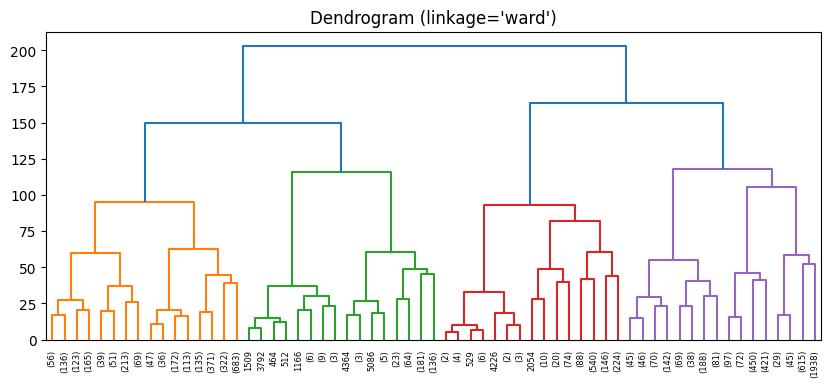

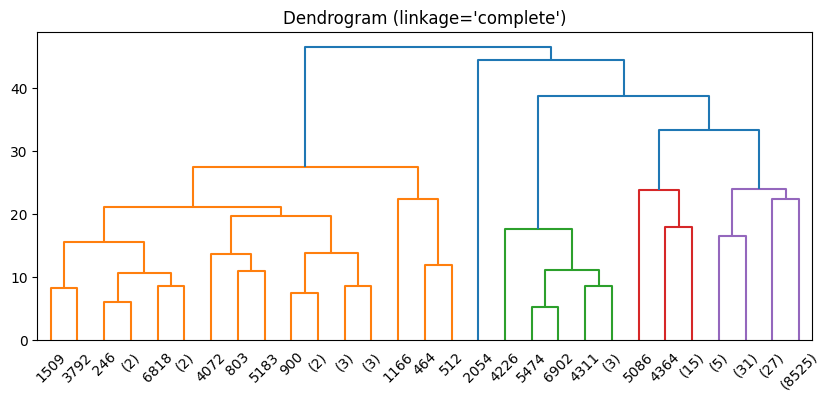

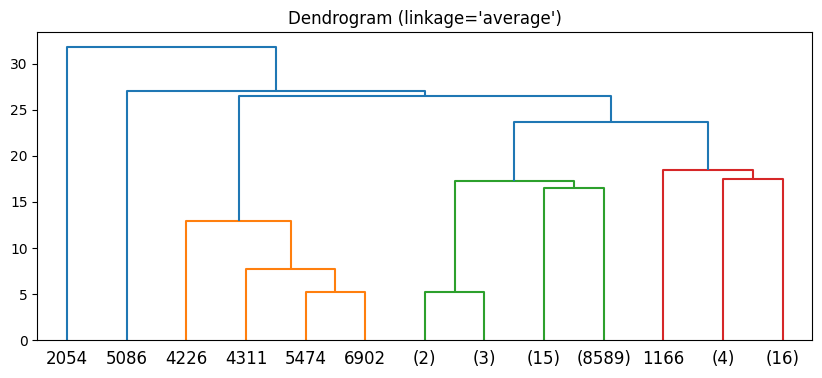

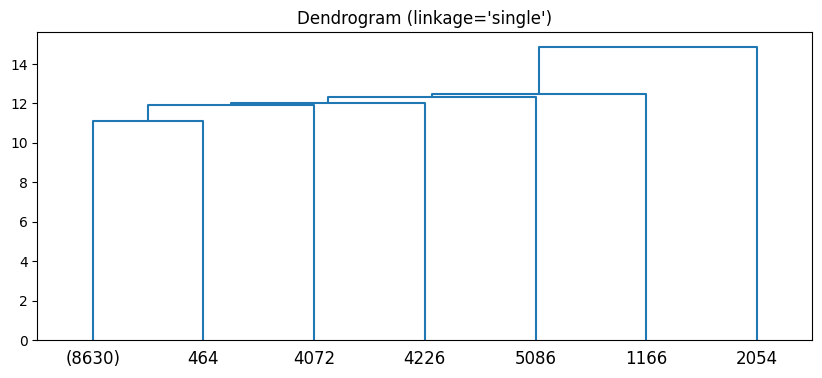

In [37]:
linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage=method)
    model = model.fit(X_scaled)
    plot_dendrogram(model, title=f"Dendrogram (linkage='{method}')", truncate_mode="level", p=5)


### 5. В задании на DBSCAN вычислите метрику WCSS и соотнесите результаты кластеризации через DBSCAN и К-средних.

In [41]:
from sklearn.cluster import KMeans, DBSCAN


def compute_wcss(X, labels):
    unique_labels = set(labels)
    if -1 in unique_labels:
        unique_labels.remove(-1)  # игнорируем выбросы

    wcss = 0
    for label in unique_labels:
        cluster_points = X[labels == label]
        centroid = cluster_points.mean(axis=0)
        distances = np.linalg.norm(cluster_points - centroid, axis=1)
        wcss += (distances ** 2).sum()
    return wcss

db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

k_means = KMeans(n_clusters=3, random_state=42).fit(X_flat)

print(f"DBSCAN WCSS: {compute_wcss(X_flat, y_db)}")
print(f"KMeans WCSS: {k_means.inertia_}")

DBSCAN WCSS: 128.73655636331478
KMeans WCSS: 157.70400815035947


### 6. Постройте кривые WCSS в зависимости от параметров DBSCAN.

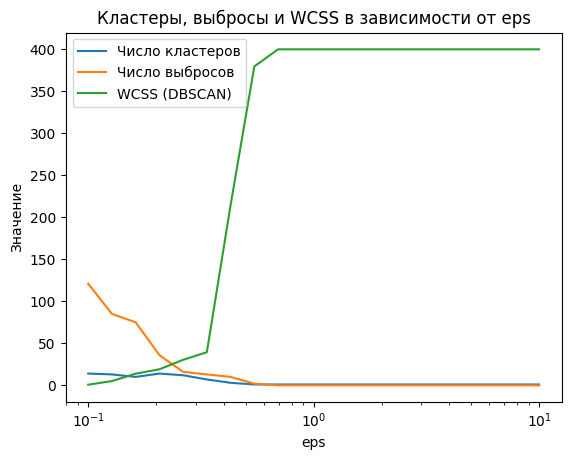

In [ ]:
def compute_wcss(X, labels):
    unique_labels = set(labels)
    if -1 in unique_labels:
        unique_labels.remove(-1)  # игнорируем выбросы

    wcss = 0
    for label in unique_labels:
        cluster_points = X[labels == label]
        centroid = cluster_points.mean(axis=0)
        distances = np.linalg.norm(cluster_points - centroid, axis=1)
        wcss += (distances ** 2).sum()
    return wcss

clusters, noise, wcss_values = [], [], []
eps_values = np.logspace(-1, 1, 20)

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=3).fit(X_flat)
    y_db = db.labels_
    
    clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
    noise.append(list(y_db).count(-1))
    wcss_values.append(compute_wcss(X_flat, y_db))

plt.plot(eps_values, clusters, label='Число кластеров')
plt.plot(eps_values, noise, label='Число выбросов')
plt.plot(eps_values, wcss_values, label='WCSS (DBSCAN)')
plt.xscale('log')
plt.legend()
plt.xlabel('eps')
plt.ylabel('Значение')
plt.title('Кластеры, выбросы и WCSS в зависимости от eps')
plt.show()


# Контрольные вопросы

**Как работает метод кластеризации К-средних?**  
Метод K-средних делит данные на K кластеров, минимизируя сумму квадратов расстояний точек до центров кластеров (центроидов). Он хорошо работает на данных с компактными, сферическими и равномерно распределёнными кластерами, но плохо — при наличии выбросов, кластеров разной плотности или формы.

**Зачем нужна нормализация признаков перед кластеризацией?**  
Нормализация приводит признаки к одному масштабу, чтобы признаки с большими значениями не доминировали при расчёте расстояний. Применяют MinMaxScaler, StandardScaler и RobustScaler в зависимости от устойчивости к выбросам.

**Какие методы определения расстояния между кластерами (linkage) существуют и чем они отличаются?**  
Single linkage — расстояние между ближайшими точками кластеров, complete — между самыми дальними, average — среднее расстояние между всеми точками двух кластеров, ward — минимизация внутрикластерной дисперсии; выбор влияет на форму дендрограммы и итоговые кластеры.

**Что такое дендрограмма, как она устроена и что показывает?**  
Дендрограмма — это дерево слияний, визуализирующее иерархическую кластеризацию; по вертикали — расстояние при слиянии, по горизонтали — слияние объектов и кластеров, помогает определить оптимальное число кластеров по точке максимального разрыва.

**Почему метод DBSCAN не очень адекватно работает на исходном датасете в лабораторной работе?**  
DBSCAN плохо справляется при разной плотности кластеров или если расстояния между точками не дают чётких плотных областей; в исходном датасете значения переменных неоднородны, распределение данных разрежено, что затрудняет выделение плотных кластеров без большого числа выбросов.
